# **Task 2 - Self Driving Car**

<img src="https://media.istockphoto.com/id/829192848/photo/woman-using-smart-phone-in-autonomous-car-self-driving-vehicle-autopilot-automotive-technology.jpg?s=612x612&w=0&k=20&c=s7O6Aw3BmsaTJxWBUoYIFZrqIzqfNXcVg10PnfJ4Ji8=" alt="Sample Image" width="1000" height="600">

# **Project Description:**

**This project is based on the concept of Self Driving Car. The main objective of this project is to train a model which can drive a car on its own. The model is trained on the basis of the data collected from the car. The data is collected using the Udacity Simulator. The model is trained using the Convolutional Neural Network. The model is trained on the basis of the images collected from the car. The model is trained to predict the steering angle of the car. The model is tested on Udacity Open Source simulator.**

# Importing Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df= pd.read_csv("data_cars.csv", names=["center_camera", "left_cam", "right_cam", "steering", "throttle", "reverse", "speed"])
df.head(10)

,center_camera,left_cam,right_cam,steering,throttle,reverse,speed
0,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000013
1,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000010
2,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000008
3,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000021
4,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000014
5,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.00,0.000000,0,0.000014
6,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,-0.05,0.016130,0,0.034646
7,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,-0.20,0.204845,0,0.088400
8,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,-0.35,0.388802,0,0.327861
9,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,C:\Users\Andy\Desktop\self_driving_car_dataset...,-0.55,0.620127,0,0.821247


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   center_camera  3930 non-null   object 
 1   left_cam       3930 non-null   object 
 2   right_cam      3930 non-null   object 
 3   steering       3930 non-null   float64
 4   throttle       3930 non-null   float64
 5   reverse        3930 non-null   int64  
 6   speed          3930 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 215.0+ KB


In [4]:
df.describe

<bound method NDFrame.describe of                                           center_camera  \
0     C:\Users\Andy\Desktop\self_driving_car_dataset...   
1     C:\Users\Andy\Desktop\self_driving_car_dataset...   
2     C:\Users\Andy\Desktop\self_driving_car_dataset...   
3     C:\Users\Andy\Desktop\self_driving_car_dataset...   
4     C:\Users\Andy\Desktop\self_driving_car_dataset...   
...                                                 ...   
3925  C:\Users\Andy\Desktop\self_driving_car_dataset...   
3926  C:\Users\Andy\Desktop\self_driving_car_dataset...   
3927  C:\Users\Andy\Desktop\self_driving_car_dataset...   
3928  C:\Users\Andy\Desktop\self_driving_car_dataset...   
3929  C:\Users\Andy\Desktop\self_driving_car_dataset...   

                                               left_cam  \
0     C:\Users\Andy\Desktop\self_driving_car_dataset...   
1     C:\Users\Andy\Desktop\self_driving_car_dataset...   
2     C:\Users\Andy\Desktop\self_driving_car_dataset...   
3     C:\Users\Andy\D

In [5]:
#Training datset and focusing on 2 features for driving in this project

train_df = df[["center_camera", "steering"]]
train_df.head()

,center_camera,steering
0,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
1,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
2,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
3,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
4,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   center_camera  3930 non-null   object 
 1   steering       3930 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.5+ KB


In [7]:
#Extracting proper path for the image

train_df["center_camera"][0].split("\\")[-1]

'center_2022_04_10_12_24_41_840.jpg'

In [8]:
train_df["center_camera"] = train_df["center_camera"].apply(lambda x: x.split("\\")[-1])
train_df.head()

,center_camera,steering
0,center_2022_04_10_12_24_41_840.jpg,0.0
1,center_2022_04_10_12_24_41_908.jpg,0.0
2,center_2022_04_10_12_24_41_976.jpg,0.0
3,center_2022_04_10_12_24_42_044.jpg,0.0
4,center_2022_04_10_12_24_42_116.jpg,0.0


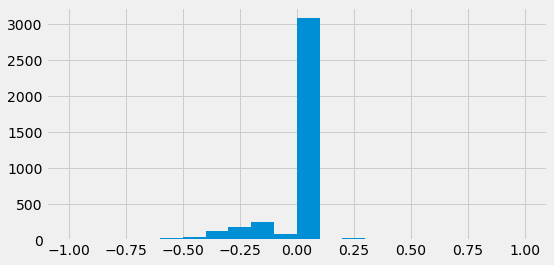

In [9]:
#Creating a graph of steering angles

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 4))
plt.hist(train_df.steering.values, bins=20);

In [10]:
train_df.steering.describe()

count    3930.000000
mean       -0.034529
std         0.133405
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

In [11]:
df_steeringnotzero = train_df.loc[train_df["steering"] != 0.0]
df_steeringnotzero.head()

,center_camera,steering
6,center_2022_04_10_12_24_42_256.jpg,-0.05
7,center_2022_04_10_12_24_42_324.jpg,-0.20
8,center_2022_04_10_12_24_42_393.jpg,-0.35
9,center_2022_04_10_12_24_42_463.jpg,-0.55
10,center_2022_04_10_12_24_42_531.jpg,-0.70


In [12]:
img_names = train_df[train_df["steering"] < 0].center_camera.values
img_names[10:20]

array(['center_2022_04_10_12_24_42_947.jpg',
       'center_2022_04_10_12_24_43_581.jpg',
       'center_2022_04_10_12_24_43_934.jpg',
       'center_2022_04_10_12_24_44_003.jpg',
       'center_2022_04_10_12_24_44_216.jpg',
       'center_2022_04_10_12_24_44_287.jpg',
       'center_2022_04_10_12_24_44_569.jpg',
       'center_2022_04_10_12_24_44_640.jpg',
       'center_2022_04_10_12_24_44_711.jpg',
       'center_2022_04_10_12_24_44_923.jpg'], dtype=object)

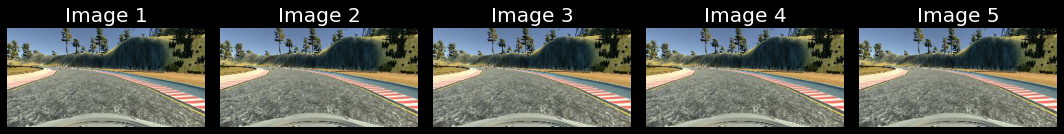

In [13]:
#plotting images of different steering angles

plt.style.use("dark_background")
img_dir = "D:\CodeClause_AI_Internship\Self_Driving_Car\dataset\IMG"
img_names = os.listdir(img_dir)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    img_path = os.path.join(img_dir, img_names[i])
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

(-0.5, 319.5, 159.5, -0.5)

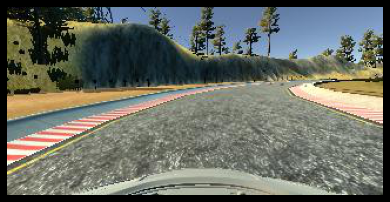

In [14]:
#Checking one image in flipped view

plt.imshow(cv2.flip(img, 1))
plt.axis('off')

**Applying data augmentation to artificially increase size of training dataset by applying various transformations**

1. Random Rotation

2. Flipped Image

0.5


(-0.5, 319.5, 159.5, -0.5)

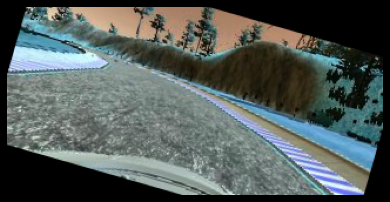

In [15]:
def random_rotation(img_path, label, max_angle=20):
    img = cv2.imread(img_path)
    angle = np.random.uniform(-max_angle, max_angle)
    rows, cols, _ = img.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img, label


img_path = os.path.join(img_dir, img_names[1])
label = 0.5 

rotated, rotated_label = random_rotation(img_path, label)
plt.imshow(rotated)
print(rotated_label)
plt.axis('off')

0.5


(-0.5, 319.5, 159.5, -0.5)

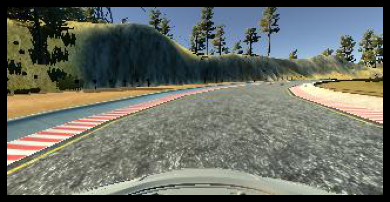

In [16]:
def flipped_data(img_dir, img_name, label):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    return (cv2.flip(img, 1), (-label))

flipped_img, new_label = flipped_data(img_dir, img_names[0], -0.5)
plt.imshow(flipped_img);
print(new_label)
plt.axis("off")

Saving new images considering flipped data augmentation for training purpose as it covers left hand side driving too

In [17]:
def augment_and_save(img_dir, img_name, label):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    new_img_name = img_name.replace(".jpg", "") + "_flipped.jpg"
    new_img_path = os.path.join(img_dir, new_img_name)
    cv2.imwrite(new_img_path, cv2.flip(img, 1))
    return (new_img_name, (-label))

In [18]:
images = []
labels = []

img_dir = "D:\CodeClause_AI_Internship\Self_Driving_Car\dataset\IMG"

for index, data in df_steeringnotzero.iterrows():
    image, label = augment_and_save(img_dir, data["center_camera"],  data["steering"])
    images.append(image)
    labels.append(label)

0.05


(-0.5, 319.5, 159.5, -0.5)

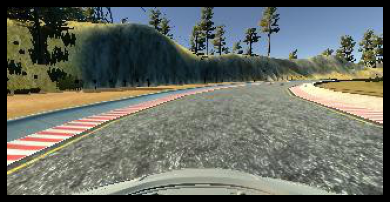

In [19]:
img_path = os.path.join(img_dir, images[0])
img = plt.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
print(labels[0])
plt.axis("off")

In [20]:
augmented_df = pd.DataFrame(list(zip(images, labels)), columns=["center_camera", "steering"])

In [21]:
df_steeringzero = train_df.query("steering == 0.0").sample(frac=.05)
len(df_steeringzero)

153

In [22]:
new_train_df = pd.concat([df_steeringzero, augmented_df, df_steeringnotzero])
new_train_df.head()

,center_camera,steering
2736,center_2022_04_10_12_27_52_307.jpg,0.0
1976,center_2022_04_10_12_26_59_429.jpg,0.0
551,center_2022_04_10_12_25_20_436.jpg,0.0
778,center_2022_04_10_12_25_36_117.jpg,0.0
2037,center_2022_04_10_12_27_03_655.jpg,0.0


In [23]:
len(new_train_df)

1891

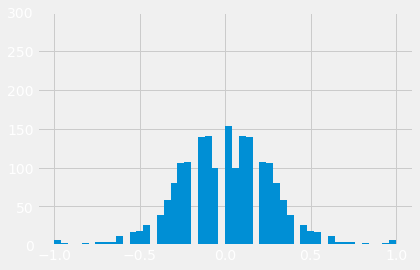

In [24]:
plt.style.use("fivethirtyeight")
plt.ylim(0, 300)
plt.hist(new_train_df.steering.values, bins=50);

In [25]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(validation_split=0.2)

In [26]:
train_generator = generator.flow_from_dataframe(
  dataframe = new_train_df,
  directory = "D:\CodeClause_AI_Internship\Self_Driving_Car\dataset\IMG",
  x_col = "center_camera",
  y_col = "steering",
  subset = "training",
  batch_size = 32,
  seed = 42,
  shuffle = True,
  class_mode = "raw",
  target_size = (160, 320),
)
valid_generator = generator.flow_from_dataframe(
  dataframe = new_train_df,
  directory = "D:\CodeClause_AI_Internship\Self_Driving_Car\dataset\IMG",
  x_col = "center_camera",
  y_col = "steering",
  subset = "validation",
  batch_size = 32,
  seed = 42,
  shuffle = True,
  class_mode = "raw",
  target_size = (160, 320),
)

Found 1513 validated image filenames.
Found 378 validated image filenames.


# Applying Model

In [27]:
data_augmentation = keras.Sequential([layers.RandomContrast(0.5),])

In [28]:
model = tf.keras.Sequential([
    layers.Input(shape=(160, 320, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [29]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"],
)

history = model.fit(
    train_generator,
    epochs=20,  
    validation_data=valid_generator,
)

Epoch 1/20
48/48 [==============================] - 136s 3s/step - loss: 0.1032 - mae: 0.2570 - val_loss: 0.0521 - val_mae: 0.1364
Epoch 2/20
48/48 [==============================] - 128s 3s/step - loss: 0.0795 - mae: 0.2270 - val_loss: 0.0530 - val_mae: 0.1370
Epoch 3/20
48/48 [==============================] - 131s 3s/step - loss: 0.0768 - mae: 0.2201 - val_loss: 0.0531 - val_mae: 0.1370
Epoch 4/20
48/48 [==============================] - 128s 3s/step - loss: 0.0747 - mae: 0.2169 - val_loss: 0.0531 - val_mae: 0.1370
Epoch 5/20
48/48 [==============================] - 128s 3s/step - loss: 0.0742 - mae: 0.2156 - val_loss: 0.0531 - val_mae: 0.1370
Epoch 6/20
48/48 [==============================] - 187s 4s/step - loss: 0.0717 - mae: 0.2125 - val_loss: 0.0530 - val_mae: 0.1368
Epoch 7/20
48/48 [==============================] - 186s 4s/step - loss: 0.0700 - mae: 0.2094 - val_loss: 0.0531 - val_mae: 0.1370
Epoch 8/20
48/48 [==============================] - 179s 4s/step - loss: 0.0693 - m

In [30]:
img.shape

(160, 320, 3)

In [31]:
np.squeeze(model.predict(tf.expand_dims(img, axis=0)))

1/1 [==============================] - 0s 499ms/step


array(0.32331777, dtype=float32)

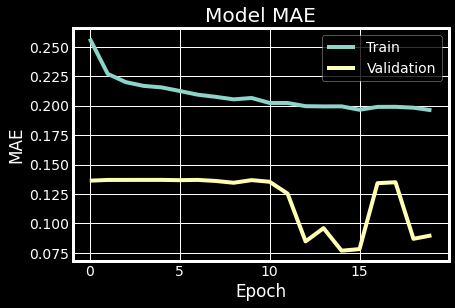

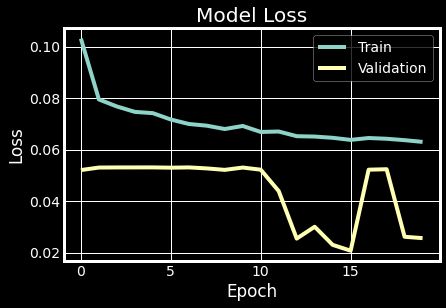

In [32]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
